In [115]:
import seaborn as sns
import numpy
import pandas
import random
from scipy.stats import nbinom
from matplotlib import cm
from matplotlib.pyplot import *

In [128]:
random.seed(1337)
numpy.random.seed(1337)
region_size = 100
num_samples = 10
ps = numpy.random.uniform(0.5,0.999,size=region_size)
pos = pandas.concat(
    [
        pandas.DataFrame(
            [nbinom.rvs(100,p,size=num_samples) for p in ps],
            columns=['D_{:04d}'.format(_) for _ in range(num_samples)]
        ),
        pandas.DataFrame(
            [nbinom.rvs(100,max(0.01,min(1,p+numpy.random.uniform(-0.4,0.4))),size=num_samples) for p in ps],
            columns=['C_{:04d}'.format(_) for _ in range(num_samples)]
        )
    ],axis=1)
ps = numpy.random.uniform(0.1,0.5,size=region_size)
neg = pandas.concat(
    [
        pandas.DataFrame(
            [nbinom.rvs(10,p,size=num_samples) for p in ps],
            columns=['D_{:04d}'.format(_) for _ in range(num_samples)]
        ),
        pandas.DataFrame(
            [nbinom.rvs(10,max(0.01,min(1,p+numpy.random.uniform(0.1,0.3))),size=num_samples) for p in ps],
            columns=['C_{:04d}'.format(_) for _ in range(num_samples)]
        )
    ],axis=1)
max_count = max(pos.max().max(),neg.max().max())

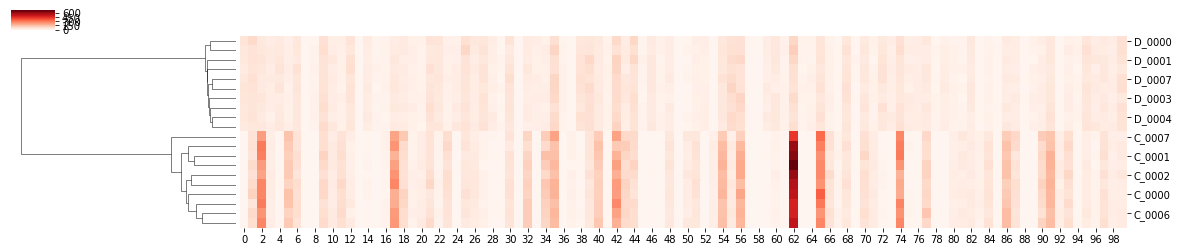

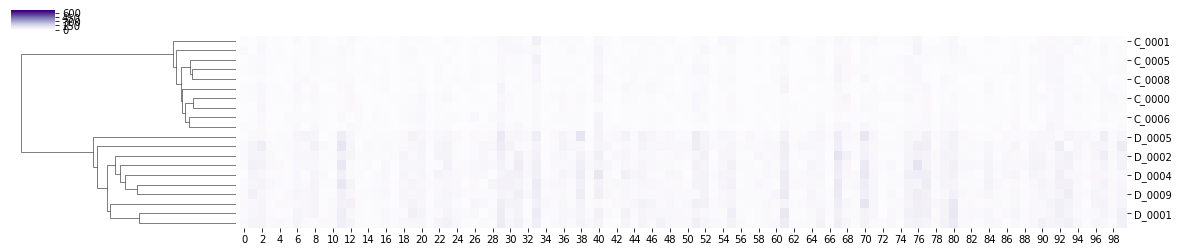

In [129]:
f = sns.clustermap(
    pos.T,
    col_cluster=False,
    cmap=cm.Reds,
    figsize=(20,4),
    vmin=0,
    vmax=max_count
)

sns.clustermap(
    neg.T,
    col_cluster=False,
    cmap=cm.Purples,
    figsize=(20,4),
    vmin=0,
    vmax=max_count
)

''

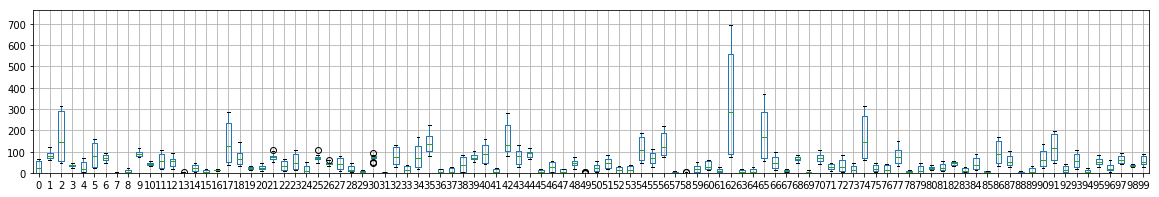

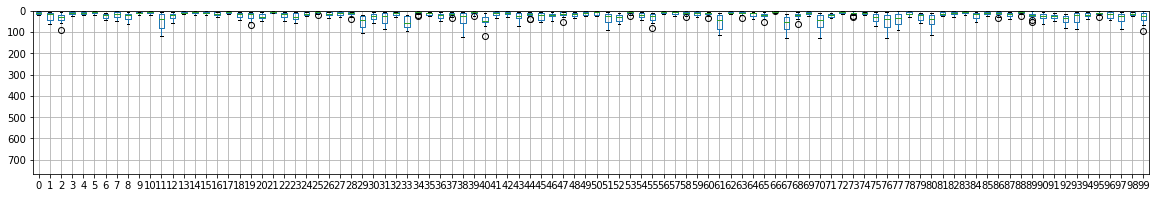

In [138]:
f = figure(figsize=(20,3))
pos.T.boxplot(ax=f.gca())
f.gca().set_ylim([0,max_count*1.1])

f = figure(figsize=(20,3))
(-neg.T).boxplot(ax=f.gca())
f.gca().set_ylim([-max_count*1.1,0])
f.gca().set_yticklabels(['{:d}'.format(int(-_)) for _ in f.gca().get_yticks()])
;

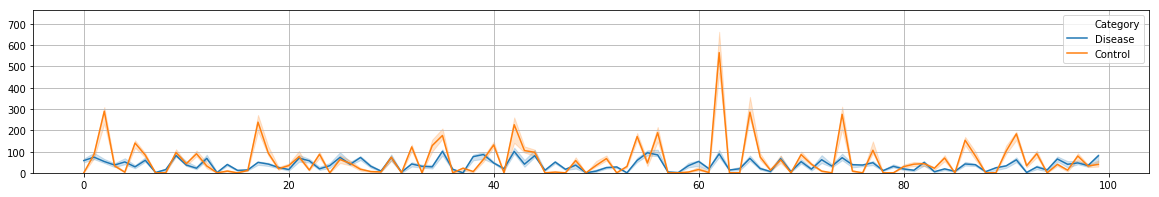

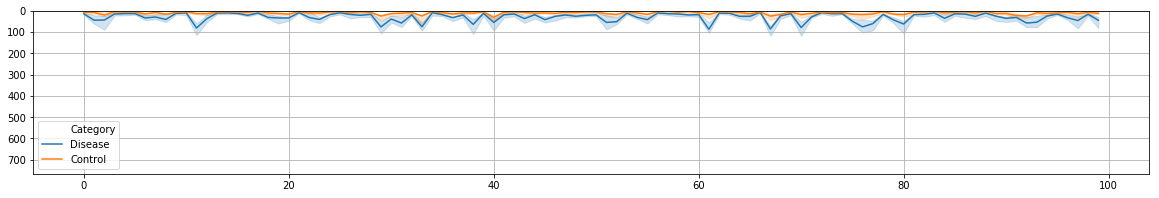

In [182]:
f = figure(figsize=(20,3))
pos['bin'] = pos.index

pos_melted = pos.melt(id_vars=['bin'])
pos_melted['Category'] = [{'D':'Disease','C':'Control'}[_[0]] for _ in pos_melted.variable]
sns.lineplot(
    x='bin',
    y='value',
    hue='Category',
    data=pos_melted,
    ci=100,
    estimator=numpy.median,
    markers=True
)
f.gca().grid()
f.gca().set_xlabel('')
f.gca().set_ylabel('')
f.gca().set_ylim([0,max_count*1.1]);

f = figure(figsize=(20,3))
neg['bin'] = neg.index

neg_melted = neg.melt(id_vars=['bin'])
neg_melted['Category'] = [{'D':'Disease','C':'Control'}[_[0]] for _ in neg_melted.variable]
neg_melted['value'] *= -1
sns.lineplot(
    x='bin',
    y='value',
    hue='Category',
    data=neg_melted,
    ci=100,
    estimator=numpy.median,
    markers=True
)
f.gca().grid()
f.gca().set_xlabel('')
f.gca().set_ylabel('')
f.gca().set_ylim([-max_count*1.1,0])
f.gca().set_yticklabels(['{:d}'.format(int(-_)) for _ in f.gca().get_yticks()]);